In [1]:
from sklearn.decomposition import PCA
from numpy import genfromtxt as readfile
from numpy import cumsum as cumulative
from numpy import arange
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pca_data = readfile('pcaData.csv', delimiter=',')


**Part A**

In [3]:
pca = PCA().fit(pca_data)

In [4]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.93824494e-01, 1.05354439e-01, 8.21066741e-04])

In [5]:
# print out the preserved variances
for index, variance in enumerate(explained_variance):
    print("Variance preserved in component {}: {}".format(index + 1, format(variance)))

Variance preserved in component 1: 0.893824493780275
Variance preserved in component 2: 0.10535443947879294
Variance preserved in component 3: 0.0008210667409321359


([<matplotlib.axis.XTick at 0x1d5e1788190>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

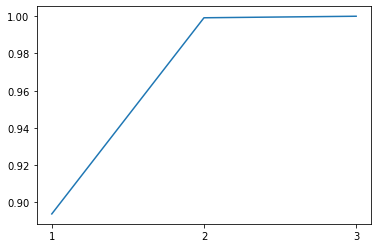

In [6]:
plt.plot(cumulative(explained_variance))
plt.xticks(arange(3), ['1', '2', '3'])

Based on the results, 2 is the minimum number of dimensions which would be sufficient to capture at least 99% of the data. The first components preserves about 89% of the variance (a little over), whereas the second preserves a little over 10% of the variance. Thus, when we sum the variations represented by these 2 dimensions, we get a little over 99%. No one dimnesion preserves 99% of the data, but 1 and 2 together preserve over 99%. 

**Part B**

<IPython.core.display.Javascript object>


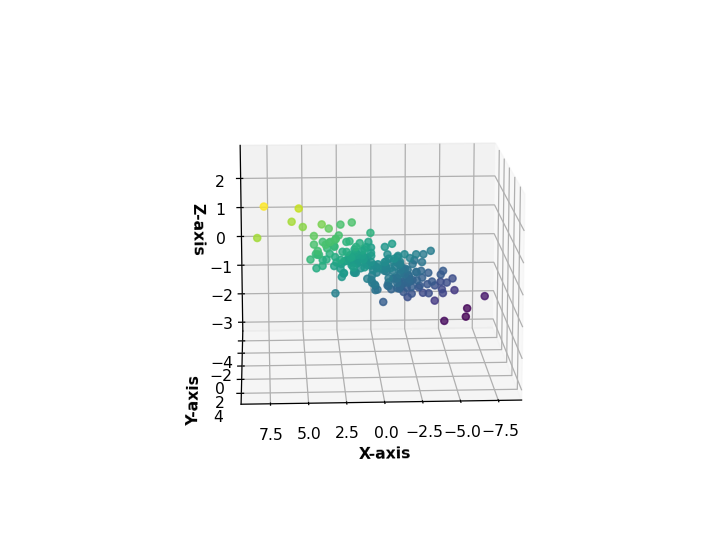

In [10]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

x = pca_data[:, 0]
y = pca_data[:, 1]
z = pca_data[:, 2]

ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')

scatter = ax.scatter(x, y, z, c=(x + y + z), alpha=.8)

The fact that the datapoints form a hyperplane best supports the findings of part B. PCA dedimensionalizes the original data while trying to preserve the original shape of the data. Because of the shape of the data as a hyperplane in 3D space, the z dimension has little effect on the variation of the data, since the majority of the variation (over 99%) is contained in the x and y axes of the data. It is this relationship that gives the data its shape. Thus, when we perform PCA on the data, the axes that account for the variation of the data are the first two, and we need only these two in order to explain most of the variance in the dataset.